## Introduction
Breast cancer is the most common cancer amongst women in the world. It is start when cells in the breast begin to grow out of control as a lump or from calcium deposition that leads to abnormal tissue in or around the breast tissue. It can be pre-cancerous (Benign) or cancerous (Malignant). In 2020, there were 685 000 death cases globally out of 2.3 million women diagnosed with breast cancer. In this portfolio, we aim to analyze the dataset of breast cancer diagnostic and determine how many women diagnose with malignant tumor. In addtion, this analysis is to prepare the dataset for next portfolio to build prediction model using machine learnign.  

#### Attribute Information:
    1) ID number 
    2) Diagnosis (M = malignant, B = benign) 

#### Ten valued features in this dataset:
    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour)
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)


#### Data source:   
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

#### Reference:
https://www.cancer.org/cancer/breast-cancer/about/what-is-breast-cancer.html

https://www.who.int/news-room/fact-sheets/detail/breast-cancer

### Step1: Importing Python Libraries

In [326]:
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)
import squarify

In [327]:
# Data processing, metrics and modeling

%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 


### Step2: Read Dataset
| Reading .CSV file from local directory |

In [328]:
# Importing the dataset

Cr_dataset = pd.read_csv('data/cancer.csv')


### Step3: Exploratory Data Analysis (EDA)
| 5 commands used for basic data exploration |    

- info() : to provides the summarized information of the data.
- head(): to see a few sample rows of the data.
- shape(): to check how many rows and columns in the dataset.
- describe() : to show the descriptive statistical details of the numerical variables in this dataset.
- nunique(): to helps us to identify if a column is categorical or continuous, so it used to get a acount of unique values.

In [329]:
Cr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [330]:
Cr_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [331]:
print (Cr_dataset.head(3))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0     

In [332]:
Cr_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [333]:
Cr_dataset.shape

(569, 33)

#### Check missing values

In [334]:
Cr_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Step 4: Features Engineering 
 | Reassign target and Drop useless features| 

In [371]:
# Drop useless variables

Cr_dataset.drop(['id', 'Unnamed: 32'], axis=1)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [372]:
# Count numbers of Malignant and Benign in diagnosis column
Cr_dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

##### There are two diagnosis results in object form. I will replace M with 1 and B with 0. So if the diagnosis is 1, which means it is cancerous.

    M, Malignant: 1  -->  Cancerous
    B, Benign:    0  -->  Not Cancerous

In [373]:
# Encoding the target feature

Cr_dataset.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [367]:
Cr_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Step 5: Target distribution (number and %)

In [374]:
M = Cr_dataset[(Cr_dataset['diagnosis'] != 0)]
B = Cr_dataset[(Cr_dataset['diagnosis'] == 0)]

### BC diagnosis acount visualization

In [375]:
trace = go.Bar(x = (len(M), len(B)), y = ['Malignant', 'Benign'], orientation = 'h', opacity = 0.6, marker=dict(
        color=[ 'darkred', 'gold'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'The Count of Diagnosis Variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


In [376]:
trace = go.Pie(labels = ['Benign','Malignant'], values = Cr_dataset['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['gold', 'darkred'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Diagnosis Variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [378]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Malignant', 'Benign']
    colors = ['#8a0c0f', '#Ffd100']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [379]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
plot_distribution('smoothness_mean', .5)


### Correlation matrix

In [346]:
#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

In [381]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale = 'matter',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [382]:
ACC=Cr_dataset[Cr_dataset.columns[:]].corr()['diagnosis']

print('All features  with thier correlations is: \n',ACC)

All features  with thier correlations is: 
 id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst    

### Checking the correlation between few features by pair

In [383]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'Malignant',
        mode = 'markers', 
        marker = dict(color = '#8a0c0f',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'Benign',
        mode = 'markers',
        marker = dict(color = '#Ffd100',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [350]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

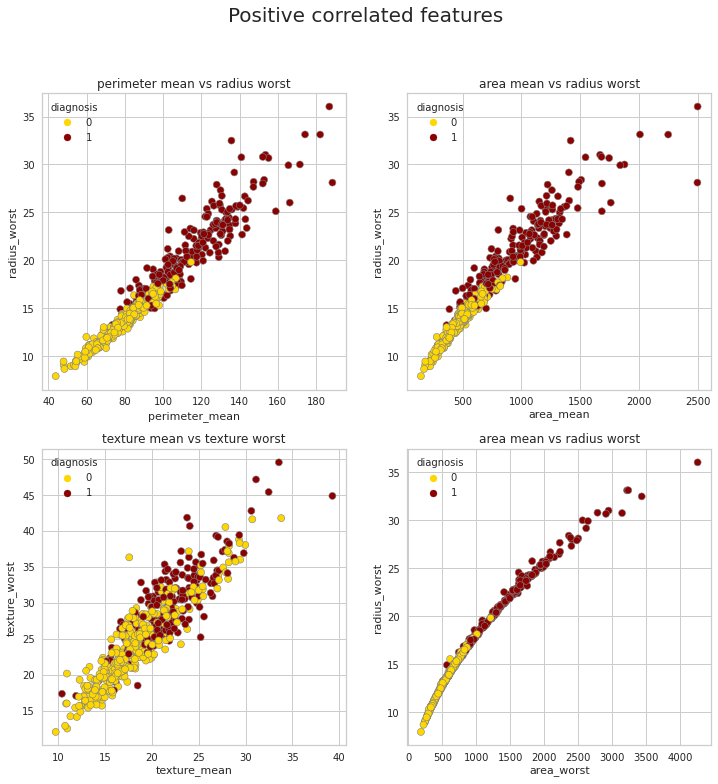

In [351]:
#seaborn version : 

palette ={0 : 'gold', 1 : 'darkred'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = Cr_dataset['perimeter_mean'], y = Cr_dataset['radius_worst'], hue = "diagnosis",
                    data = Cr_dataset, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = Cr_dataset['area_mean'], y = Cr_dataset['radius_worst'], hue = "diagnosis",
                    data = Cr_dataset, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = Cr_dataset['texture_mean'], y = Cr_dataset['texture_worst'], hue = "diagnosis",
                    data = Cr_dataset, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = Cr_dataset['area_worst'], y = Cr_dataset['radius_worst'], hue = "diagnosis",
                    data = Cr_dataset, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

### Data splitting 
| Random sampling |

In [352]:
# create train/test split
train, test = train_test_split(Cr_dataset, train_size=0.7, random_state=110)

# dimensions of training data
train.shape

(398, 33)

In [353]:
all_mean= list(Cr_dataset.columns[1:11])
all_se= list(Cr_dataset.columns[11:20])
all_worst=list(Cr_dataset.columns[21:31])
print(all_mean)
print("-----------------------------------")
print(all_se)
print("------------------------------------")
print(all_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
-----------------------------------
['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']
------------------------------------
['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [354]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [355]:
#now split our data into train and test
train, test = train_test_split(Cr_dataset, test_size = 0.2)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(455, 33)
(114, 33)


In [356]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [357]:
#now split our data into train and test
train, test = train_test_split(Cr_dataset, test_size = 0.5)# in this our main data is splitted into train and test

# we can check their dimension
print(train.shape)
print(test.shape)

(284, 33)
(285, 33)


In [358]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [359]:
prediction_var = all_mean # taking all features

In [384]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis